In [184]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.datasets import cifar10
from skimage import exposure
from scipy.signal import wiener
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report

In [170]:
(x_train_raw,y_train_raw),(x_test_raw,y_test_raw)=cifar10.load_data()

In [171]:
def image_enhancement(images):
    enhanced_images = []
    for image in images:
        enhanced_img = []
        for channel in range(3):  # Iterate over the 3 channels
            img_channel = image[:, :, channel]
            g = 1.5
            gamma_correction = exposure.adjust_gamma(img_channel, gamma=g)

            kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
            sharpen = cv.filter2D(gamma_correction, -1, kernel)

            enhanced_img.append(sharpen)

        enhanced_img = np.stack(enhanced_img, axis=2)
        enhanced_images.append(enhanced_img)

    return np.array(enhanced_images)

In [172]:
x_train=image_enhancement(x_train_raw)
x_test=image_enhancement(x_test_raw)

In [173]:
x_train=x_train_raw.astype('float32')/255.0
x_test=x_test_raw.astype('float32')/255.0

In [175]:
y_train_raw = y_train_raw - np.min(y_train_raw)
y_test_raw = y_test_raw - np.min(y_test_raw)

y_train = to_categorical(y_train_raw, num_classes=10)
y_test = to_categorical(y_test_raw, num_classes=10)

In [176]:
data=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [177]:
data.fit(x_train)

In [187]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [188]:
hist=model.fit(data.flow(x_train,y_train,batch_size=128),epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
391/391 [==============================] - 15s 37ms/step - loss: 1.6947 - accuracy: 0.3878 - val_loss: 1.4120 - val_accuracy: 0.5017
Epoch 2/40
391/391 [==============================] - 14s 36ms/step - loss: 1.4239 - accuracy: 0.4934 - val_loss: 1.2568 - val_accuracy: 0.5635
Epoch 3/40
391/391 [==============================] - 14s 37ms/step - loss: 1.3179 - accuracy: 0.5373 - val_loss: 1.2499 - val_accuracy: 0.5685
Epoch 4/40
391/391 [==============================] - 14s 36ms/step - loss: 1.2594 - accuracy: 0.5590 - val_loss: 1.1103 - val_accuracy: 0.6084
Epoch 5/40
391/391 [==============================] - 14s 36ms/step - loss: 1.2102 - accuracy: 0.5774 - val_loss: 1.1179 - val_accuracy: 0.6130
Epoch 6/40
391/391 [==============================] - 14s 36ms/step - loss: 1.1714 - accuracy: 0.5918 - val_loss: 1.0533 - val_accuracy: 0.6358
Epoch 7/40
391/391 [==============================] - 14s 37ms/step - loss: 1.1393 - accuracy: 0.6020 - val_loss: 1.0329 - val_accuracy:

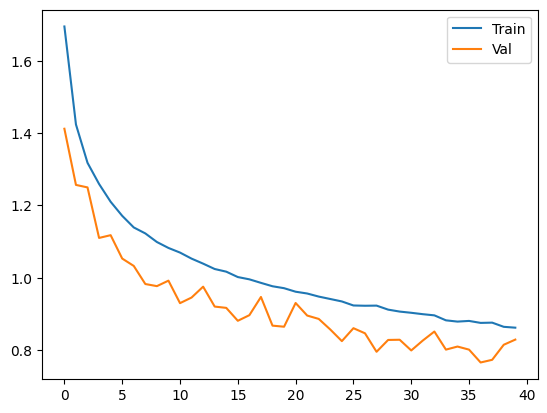

In [189]:
plt.plot(hist.history['loss'],label='Train')
plt.plot(hist.history['val_loss'],label='Val')
plt.legend()

In [190]:
y_pred=model.predict(x_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

313/313 [==============================] - 0s 1ms/step


In [191]:
print(classification_report(y_pred_class,y_true))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1106
           1       0.87      0.80      0.83      1078
           2       0.52      0.75      0.62       693
           3       0.38      0.70      0.49       539
           4       0.68      0.71      0.69       955
           5       0.59      0.73      0.65       812
           6       0.92      0.61      0.74      1507
           7       0.79      0.78      0.79      1005
           8       0.80      0.85      0.82       943
           9       0.90      0.66      0.76      1362

    accuracy                           0.72     10000
   macro avg       0.72      0.73      0.72     10000
weighted avg       0.77      0.72      0.73     10000



In [3]:
a=[9380,4608,4377,4434,3203,3455,3794,3647,2913,2674,2551]
b=[]
for i in a:
    print("13002/",i,'= ',13002/i)
    b.append(13002/i)
b

13002/ 9380 =  1.386140724946695
13002/ 4608 =  2.8216145833333335
13002/ 4377 =  2.970527758738862
13002/ 4434 =  2.93234100135318
13002/ 3203 =  4.059319388073681
13002/ 3455 =  3.7632416787264833
13002/ 3794 =  3.426989984185556
13002/ 3647 =  3.565122018097066
13002/ 2913 =  4.463439752832132
13002/ 2674 =  4.862378459237098
13002/ 2551 =  5.096824774598197


[1.386140724946695,
 2.8216145833333335,
 2.970527758738862,
 2.93234100135318,
 4.059319388073681,
 3.7632416787264833,
 3.426989984185556,
 3.565122018097066,
 4.463439752832132,
 4.862378459237098,
 5.096824774598197]

In [5]:
count =2
for i in b:
    print(i,'/',count,'= ',(i/count)*100)
    count+=1

1.386140724946695 / 2 =  69.30703624733475
2.8216145833333335 / 3 =  94.05381944444446
2.970527758738862 / 4 =  74.26319396847155
2.93234100135318 / 5 =  58.6468200270636
4.059319388073681 / 6 =  67.65532313456136
3.7632416787264833 / 7 =  53.76059541037833
3.426989984185556 / 8 =  42.83737480231945
3.565122018097066 / 9 =  39.61246686774518
4.463439752832132 / 10 =  44.634397528321315
4.862378459237098 / 11 =  44.203440538519075
5.096824774598197 / 12 =  42.47353978831831


In [4]:
(2.931507/2)*100

146.57535